Multi-layer Perceptron Regressor (MLPRegressor) - MLP também pode ser usado para resolver problemas de regressão. Para este exemplo foi utilizado o conjunto de dados House Sales em King County, EUA, da plataforma “Kaggle” (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [1]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP - REDE NEURAL MULTICAMADAS
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Biblioteca utilizada para normalização dos dados - PRÉ-PROCESSAMENTO
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

Mounted at /content/drive


In [16]:
# --- Carregamento do Dataset Completo ---
# Caminho do dataset no Google Drive que será carregado em df
# ATENÇÃO: Certifique-se de que o arquivo 'ressonanciaMLP.csv' está neste caminho no seu Google Drive.
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/ressonanciaMLP.csv")
print(f"\nDataFrame 'df' carregado com sucesso. Shape: {df.shape}")

# Verificação das colunas (espera-se 'x1', 'x2', 'x3', 'd' conforme sua verificação anterior)
print("Colunas disponíveis no df:")
print(df.columns)


DataFrame 'df' carregado com sucesso. Shape: (200, 4)
Colunas disponíveis no df:
Index(['x1', 'x2', 'x3', 'd'], dtype='object')


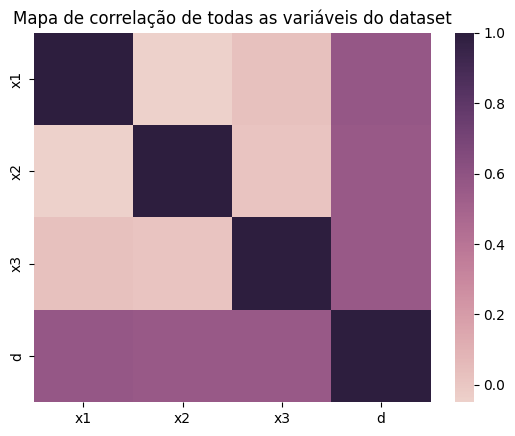

In [26]:
# Gera um gráfico matricial para apresentar a correlação entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=False, cmap=sns.cubehelix_palette(as_cmap=True)) #
ax.set_title('Mapa de correlação de todas as variáveis do dataset')
plt.show() # Para exibir o gráfico

In [31]:
# Pré-Processamento dos Dados
x = df.drop('d', axis=1)
y = df['d']

# Padronização de dados da saída (y) dividindo pelo valor máximo
maxY = y.max()
y = y/maxY
print(f"\nValor máximo de y para normalização (maxY): {maxY:.4f}")

scaler = StandardScaler().fit(x)
x = scaler.transform(x)

# Separação do dataset em amostras para treino e teste, considerando 30%
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=42)

print(f"\nDados divididos com train_test_split (test_size=0.30):")
print(f"  trainX shape: {trainX.shape}")
print(f"  trainY shape: {trainY.shape}")
print(f"  testX shape: {testX.shape}")
print(f"  testY shape: {testY.shape}")


Valor máximo de y para normalização (maxY): 0.9904

Dados divididos com train_test_split (test_size=0.30):
  trainX shape: (140, 3)
  trainY shape: (140,)
  testX shape: (60, 3)
  testY shape: (60,)


In [46]:
# Treinamento Individual

current_activation = 'tanh'
current_neurons = 15

# Configurações fixas conforme o enunciado e o modelo
learning_rate = 0.01
max_epochs_training = 1000
random_seed = 42

print(f"Ativação={current_activation}, Neurônios={current_neurons} ---")

mlp_reg = MLPRegressor(hidden_layer_sizes=(current_neurons,),
                       activation=current_activation,
                       solver='adam',
                       learning_rate_init=learning_rate,
                       max_iter=max_epochs_training,
                       tol=0.0000001,
                       epsilon=1e-08,
                       n_iter_no_change=10,
                       verbose=False,
                       random_state=random_seed)

mlp_reg.fit(trainX, trainY)

final_loss = mlp_reg.loss_curve_[-1]
num_epochs = mlp_reg.n_iter_

print(f"  Perda Final: {final_loss:.4f} | Épocas: {num_epochs}")


Ativação=tanh, Neurônios=15 ---
  Perda Final: 0.0000 | Épocas: 639


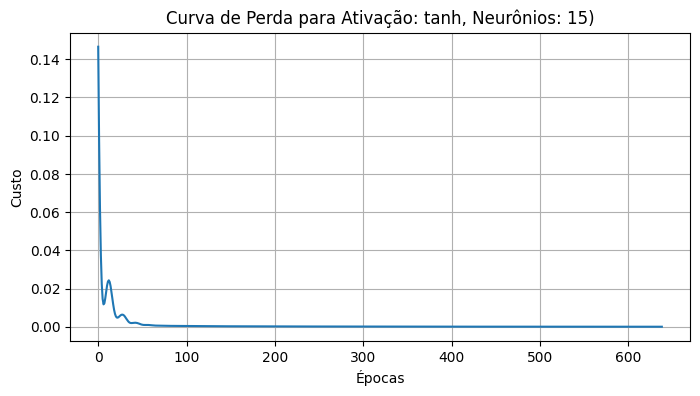

In [47]:
# Plotar a curva de perda deste treinamento individual
plt.figure(figsize=(8, 4))
plt.plot(mlp_reg.loss_curve_)
plt.title(f'Curva de Perda para Ativação: {current_activation}, Neurônios: {current_neurons})')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.grid(True)
plt.show()

Carregando o Conjunto de Teste
Conjunto de teste para validação carregado. Shape: (20, 3)


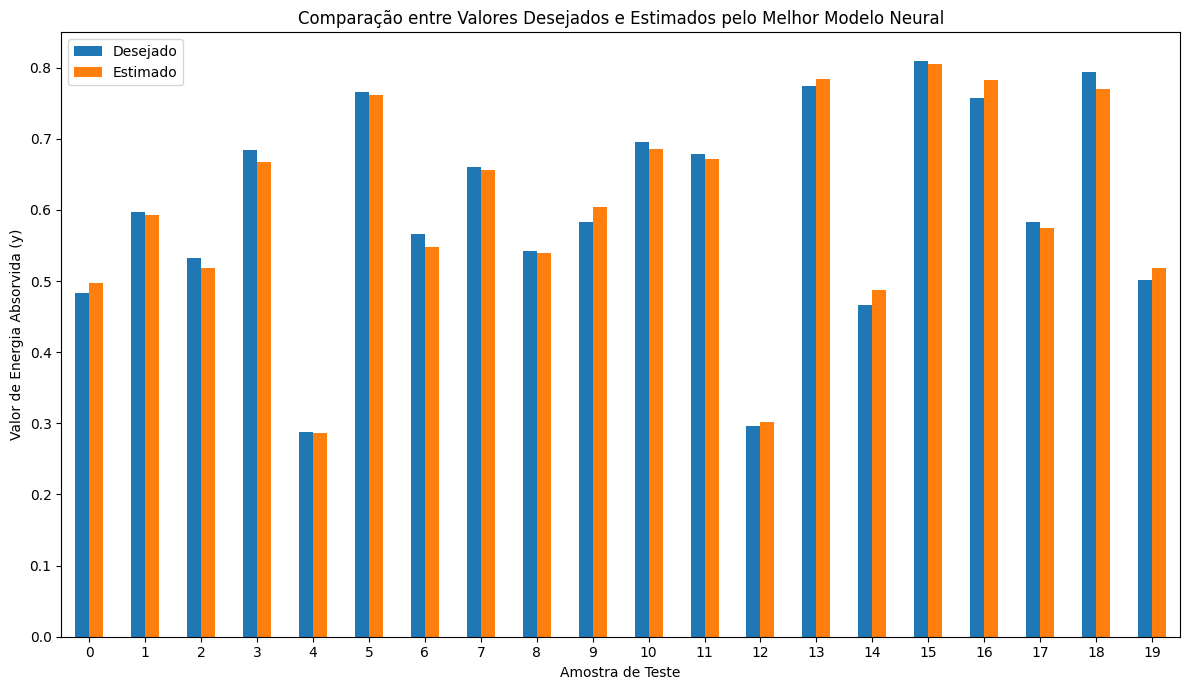


Mean Absolute Error (MAE): 0.011646660500341726
Mean Squared Error (MSE): 0.0001910696794126345
Root Mean Squared Error (RMSE): 0.013822795643886027
Mean Absolute Percentage Error (MAPE): 1.9798820659947018
R2:  0.9911469992659121


In [49]:
# Melhor Modelo com Conjunto de Teste


print("Carregando o Conjunto de Teste")
# Dados de teste fornecidos na tabela
test_data_str = """
Amostra,x1,x2,x3,d
1,0.0611,0.2860,0.7464,0.4831
2,0.5102,0.7464,0.0860,0.5965
3,0.0004,0.6916,0.5006,0.5318
4,0.9430,0.4476,0.2648,0.6843
5,0.1399,0.1610,0.2477,0.2872
6,0.6423,0.3229,0.8567,0.7663
7,0.6492,0.0007,0.6422,0.5666
8,0.1818,0.5078,0.9046,0.6601
9,0.7382,0.2647,0.1916,0.5427
10,0.3879,0.1307,0.8656,0.5836
11,0.1903,0.6523,0.7820,0.6950
12,0.8401,0.4490,0.2719,0.6790
13,0.0029,0.3264,0.2476,0.2956
14,0.7088,0.9342,0.2763,0.7742
15,0.1283,0.1882,0.7253,0.4662
16,0.8882,0.3077,0.8931,0.8093
17,0.2225,0.9182,0.7820,0.7581
18,0.1957,0.8423,0.3085,0.5826
19,0.9991,0.5914,0.3933,0.7938
20,0.2299,0.1524,0.7353,0.5012
"""
import io
df_validation_test = pd.read_csv(io.StringIO(test_data_str))

# Separar features (x_val) e target (d_val)
x_val = df_validation_test[['x1', 'x2', 'x3']]
d_val = df_validation_test['d']

print(f"Conjunto de teste para validação carregado. Shape: {x_val.shape}")

# Usando o 'scaler' ajustado no treinamento
x_val_scaled = scaler.transform(x_val)

# Saídas baseado no modelo treinado
y_pred_val_scaled = mlp_reg.predict(x_val_scaled)

y_pred_original_scale_val = y_pred_val_scaled * maxY

# Criação de um dataframe com os dados desejados
df_temp_val = pd.DataFrame({'Desejado': d_val, 'Estimado': y_pred_original_scale_val})

# Configuração do tipo de gráfico 'bar'(barras)
df_temp_val.plot(kind='bar', figsize=(12, 7))
plt.title('Comparação entre Valores Desejados e Estimados pelo Melhor Modelo Neural')
plt.xlabel('Amostra de Teste')
plt.ylabel('Valor de Energia Absorvida (y)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Resumo das Métricas
print('\nMean Absolute Error (MAE):', metrics.mean_absolute_error(d_val, y_pred_original_scale_val))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(d_val, y_pred_original_scale_val))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(d_val, y_pred_original_scale_val)))

def safe_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1e-10, y_true))) * 100

print('Mean Absolute Percentage Error (MAPE):', safe_mape(d_val, y_pred_original_scale_val))
print('R2: ', metrics.r2_score(d_val, y_pred_original_scale_val))